# Projeto COVID-19

## Digital Innovation One

In [16]:
import pandas as pd
import numpy as np 
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go 
import nbformat

In [4]:
# Importando dados para o projeto

url = "https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true"

df = pd.read_csv(url, parse_dates=['ObservationDate','Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [6]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [5]:
import re

def corrigeColunas(colName):
    return re.sub(r"[/| ]", "", colName).lower()

In [6]:
corrigeColunas("tes/te")

'teste'

In [7]:
df.columns = [corrigeColunas(col) for col in df.columns]

In [9]:
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


# Brasil

In [8]:
df.loc[df.countryregion == "Brazil"]

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [9]:
brasil = df.loc[
    (df.countryregion == "Brazil") &
    (df.confirmed > 0)
    ]

In [11]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


# Casos confirmados

In [12]:
px.line(brasil, 'observationdate','confirmed',title="Casos confirmados no Brasil")

# Novos casos por dia

In [13]:
brasil["novoscasos"] = list(map(
    lambda x: 0 if (x==0) else brasil["confirmed"].iloc[x] - brasil["confirmed"].iloc[x-1],
    np.arange(brasil.shape[0])
))

<ipython-input-13-d43ecfd1782f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


In [16]:
px.line(brasil, x='observationdate', y ='novoscasos', title= 'Novos casos por dia')

# Mortes

In [20]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name="Mortes",
                mode= 'lines+markers',line={'color':'red'})
)


fig.update_layout(title="Mortes por COVID-19 no Brasil")

fig.show()

# Taxa de crescimento

In [11]:
def taxaCrescimento(data, variable,data_inicio=None,data_fim=None):
    #Se data_inicio = None, define como a primeira data disponível
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable]>0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)

    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)

    #Define os valores do presente e passado
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]

    #Define o numero de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days

    taxa = (presente / passado) **(1/n) - 1   

    return taxa*100 

In [12]:
# Taxa de crescimento médio do covid no Brasil em todo o período

taxaCrescimento(brasil, 'confirmed')

16.27183353112116

In [13]:
def taxaCrescimentoDiaria(data, variable,data_inicio=None):
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable]>0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)

    data_fim = data.observationdate.max()

    # Define o numero de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days

    # Taxa calculada de um dia para o outro
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1, n+1)
    ))

    return np.array(taxas) * 100

In [14]:
txDia = taxaCrescimentoDiaria(brasil,"confirmed")

In [15]:
txDia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [17]:
primeiroDia = brasil.observationdate.loc[brasil.confirmed>0].min()

px.line(x=pd.date_range(primeiroDia,brasil.observationdate.max())[1:],
        y=txDia, title= "Taxa de crescimento de casos confirmados no Brasil" )

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [26]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados



observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [27]:
res = seasonal_decompose(confirmados)

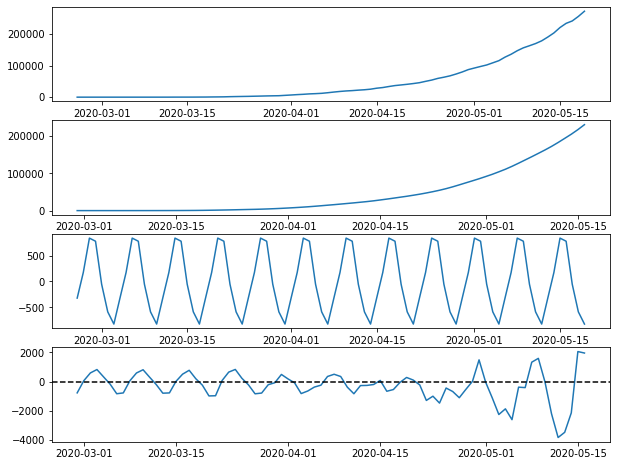

In [30]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

# ARIMA 

In [31]:
from pmdarima.arima import auto_arima

modelo = auto_arima(confirmados)

In [32]:
fig = go.Figure(go.Scatter(
    x = confirmados.index, y= confirmados, name= 'Observados'
))

fig.add_trace(go.Scatter(
    x = confirmados.index, y= modelo.predict_in_sample(), name="Preditos"
))

fig.add_trace(go.Scatter(
    x = pd.date_range('2020-05-20','2020-06-20'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()